In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import math
import netCDF4
from kolzur_filter import kz_filter, kzft, kzp, _kz_coeffs
subplot_matrix = []

In [21]:
filelist = ['Eastern', 'Tap Mun', 'Tsuen Wan', 'Tung Chung', 'Yuen Long', 'Kwai Chung', 'Kwun Tong', 'Macau', 'Sha Tin', 'ShamShuiPo']

In [22]:
variablelist = ['Pressure', 'RH', 'Temperature', 'Wind']

In [23]:
time1 = '20360101-20451231'
time2 = '20460101-20551231'
time3 = '20860101-20951231'
time4 = '20960101-21001231'
timelist = [time1, time2, time3, time4]

In [24]:
# latitude = 100 # Latitude range from -90 to 90: len(lat) = 160
# longitude = 102 # Longitude range from 0 to 360: len(lon) = 320
# Eastern: 22.3036, 114.1719
# Tap Mun: 22.3036, 114.1719
# Tsuen Wan: 22.3594, 114.2153 ###
# Tung Chung: 22.2911, 113.9069
# Yuen Long: 22.4706, 113.9811
# Kwai Chung: 22.3594, 114.2153 ###
# Kwun Tong: 22.3147, 114.2233 ###
# Macau: 22.1600, 113.5650
# Sha Tin: 22.3036, 114.1719
# Sham Shui Po: 22.3315, 114.1567
location = [[99,101],[99,101],[99,102],[99,101],[99,101],[99,102],[99,102],[99,101],[99,101],[99,101]]

In [25]:
# Set the directory
directory = "Future Regression/"
if not os.path.exists(directory):
    os.makedirs(directory)

In [26]:
# Import future weather variables
directory_import = "Future Data/"
# Import regression coefficients
directory_import_regression = "Regression Coefficients/"

In [105]:
def future_regression(station):
    if station == 'Tap Mun':
        return
    m = 29
    k = 3
    w = int(k * (m - 1) / 2)
    
    pressure = []
    rh = []
    temperature = []
    wind = []
    timestamp = []
    header = [pressure, rh, temperature, wind]
    for i in range(len(header)):
        for j in range(len(timelist)):
            value = pd.read_csv(directory_import + station + "_" + variablelist[i] + "_" + timelist[j] + '.csv','r')
            value = np.array(value)
            for v in range(len(value)):
                add = value[v][0].split(',')[1]
                time = value[v][0].split(',')[0]
                if i == 0:
                    timestamp.append(time)
                header[i].append(add)
    print(station, len(pressure), len(rh), len(temperature), len(wind), len(timestamp))
    
    # Import regression coefficients
    read = directory_import_regression + station + '.csv'
    coefficients = pd.read_csv(directory_import_regression + station + '.csv', 'r', header=None)
    coefficients = np.array(coefficients)
    coeff = coefficients[0][0]
    intercept = float(coeff.split(',')[0])
    beta_ps = float(coeff.split(',')[1])
    beta_rh = float(coeff.split(',')[2])
    beta_t = float(coeff.split(',')[3])
    beta_ws = float(coeff.split(',')[4])
    
    print('Regression Coefficients:', round(intercept,4), round(beta_ps,4), round(beta_rh,4), round(beta_t,4), round(beta_ws, 4))
    
    # 2045-2050
    cut1 = 0
    year = int(timestamp[cut1].split('-')[0])
    while(year < 2045):
        year = int(timestamp[cut1].split('-')[0])
        cut1 += 1
    cut1 -= 1
    cut2 = cut1
    while(year < 2051):
        year = int(timestamp[cut2].split('-')[0])
        cut2 += 1
    cut2 -= 1
    timestamp1 = timestamp[cut1:cut2]
    pressure1 = np.array(pressure[cut1:cut2])
    rh1 = np.array(rh[cut1:cut2])
    temperature1 = np.array(temperature[cut1:cut2])
    wind1 = np.array(wind[cut1:cut2])
    
    
    timestamp1 = timestamp1[w:-w]
    pressure1 = np.asfarray(pressure1, float)
    rh1 = np.asfarray(rh1, float)
    temperature1 = np.asfarray(temperature1, float)
    wind1 = np.asfarray(wind1, float)
    
    # KZ Filter
    pressure1 = kz_filter(pressure1, m, k)
    rh1 = kz_filter(rh1, m, k)
    temperature1 = kz_filter(temperature1, m, k)
    wind1 = kz_filter(wind1, m, k)
    
    y1 = []
    jan = []
    feb = []
    mar = []
    apr = []
    may = []
    jun = []
    jul = []
    aug = []
    sep = []
    ocb = []
    nov = []
    dec = []
    for t in range(len(timestamp1)):
        yhat = intercept + beta_ps*float(pressure1[t]) + beta_rh*float(rh1[t]) + beta_t*float(temperature1[t]) + beta_ws*float(wind1[t])
        y1.append(yhat)
        #2045-02-12 12:00:00
        if int(timestamp1[t].split('-')[1]) == 1:
            jan.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 2:
            feb.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 3:
            mar.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 4:
            apr.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 5:
            may.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 6:
            jun.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 7:
            jul.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 8:
            aug.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 9:
            sep.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 10:
            ocb.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 11:
            nov.append(math.exp(yhat))
        if int(timestamp1[t].split('-')[1]) == 12:
            dec.append(math.exp(yhat))
    
    fig = plt.figure()  # Create a figure
    ax = plt.axes()  # Create axis
    ax.grid(True)
    plt.plot(timestamp1, y1, label='O3_BL')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Set Maximum number of x-axis values to show
    fig.autofmt_xdate()  # Rotate values to see more clearly
    plt.legend(loc='best')
    title = station + ' 2045-2050'
    plt.title(title)
    plt.ylabel("ln(ppb)")
    fig.savefig(directory + station + ' 2045-2050'+ ".png")
    
    # 2095-2100
    while(year < 2095):
        year = int(timestamp[cut2].split('-')[0])
        cut2 += 1
    cut2 -= 1
    timestamp2 = timestamp[cut2:]
    pressure2 = np.array(pressure[cut2:])
    rh2 = np.array(rh[cut2:])
    temperature2 = np.array(temperature[cut2:])
    wind2 = np.array(wind[cut2:])
    
    
    timestamp2 = timestamp2[w:-w]
    pressure2 = np.asfarray(pressure2, float)
    rh2 = np.asfarray(rh2, float)
    temperature2 = np.asfarray(temperature2, float)
    wind2 = np.asfarray(wind2, float)
    
    # KZ Filter
    pressure2 = kz_filter(pressure2, m, k)
    rh2 = kz_filter(rh2, m, k)
    temperature2 = kz_filter(temperature2, m, k)
    wind2 = kz_filter(wind2, m, k)
    
    y2 = []
    jan2 = []
    feb2 = []
    mar2 = []
    apr2 = []
    may2 = []
    jun2 = []
    jul2 = []
    aug2 = []
    sep2 = []
    ocb2 = []
    nov2 = []
    dec2 = []
    for t in range(len(timestamp2)):
        yhat = intercept + beta_ps*float(pressure2[t]) + beta_rh*float(rh2[t]) + beta_t*float(temperature2[t]) + beta_ws*float(wind2[t])
        y2.append(yhat)
        y1.append(yhat)
        #2095-02-12 12:00:00
        if int(timestamp2[t].split('-')[1]) == 1:
            jan2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 2:
            feb2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 3:
            mar2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 4:
            apr2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 5:
            may2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 6:
            jun2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 7:
            jul2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 8:
            aug2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 9:
            sep2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 10:
            ocb2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 11:
            nov2.append(math.exp(yhat))
        if int(timestamp2[t].split('-')[1]) == 12:
            dec2.append(math.exp(yhat))
    
    fig = plt.figure()  # Create a figure
    ax = plt.axes()  # Create axis
    ax.grid(True)
    plt.plot(timestamp2, y2, label='O3_BL')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Set Maximum number of x-axis values to show
    fig.autofmt_xdate()  # Rotate values to see more clearly
    plt.legend(loc='best')
    title = station + ' 2095-2100'
    plt.title(title)
    plt.ylabel("ln(ppb)")
    fig.savefig(directory + station + ' 2095-2100'+ ".png")
    
    
    # Result csv saved into directory: "Future Regression/"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    heads = ['O3 Concentrations (ppb)', '2013-2017', '2045-2050', '2095-2100']
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month2045 = [jan, feb, mar, apr, may, jun, jul, aug, sep, ocb, nov, dec]
    month2095 = [jan2, feb2, mar2, apr2, may2, jun2, jul2, aug2, sep2, ocb2, nov2, dec2]
    
    # Average
    resultMatrix = [[0 for x in range(len(heads))] for y in range(len(months) + 1)]
    for row in range(len(resultMatrix)-1):
        resultMatrix[row+1][2] = np.mean(month2045[row])
        resultMatrix[row+1][3] = np.mean(month2095[row])
    resultMatrix[0] = heads
    resultMatrix = np.array(resultMatrix)
    resultMatrix[:, 0][1:] = months
    
    # Import 2013-2017 Data
    past_value = pd.read_csv('Subtraction Result/' + station + '.csv','r')
    past_value = np.array(past_value)
    jan3 = []
    feb3 = []
    mar3 = []
    apr3 = []
    may3 = []
    jun3 = []
    jul3 = []
    aug3 = []
    sep3 = []
    ocb3 = []
    nov3 = []
    dec3 = []
    for row in range(len(past_value)):
        if int(past_value[row][0].split("/")[1]) == 1:
            jan3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 2:
            feb3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 3:
            mar3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 4:
            apr3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 5:
            may3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 6:
            jun3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 7:
            jul3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 8:
            aug3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 9:
            sep3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 10:
            ocb3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 11:
            nov3.append(float(past_value[row][0].split(",")[1]))
        if int(past_value[row][0].split("/")[1]) == 12:
            dec3.append(float(past_value[row][0].split(",")[1]))
    month2013 = [jan3, feb3, mar3, apr3, may3, jun3, jul3, aug3, sep3, ocb3, nov3, dec3]
    for row in range(len(resultMatrix)-1):
        resultMatrix[row+1][1] = np.mean(month2013[row])
    
    
    # Write csv file of result matrix
    with open(directory + station + '.csv', "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        for val in resultMatrix:
            writer.writerow(val)
    

    

Eastern 12783 12783 12783 12783 12783
Regression Coefficients: -52.4818 0.0005 -0.0167 0.0664 0.0908


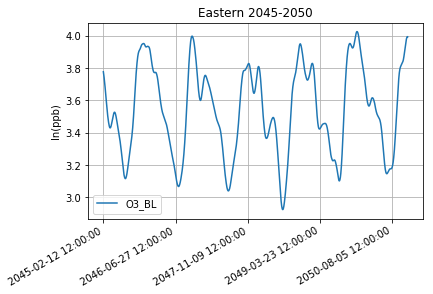

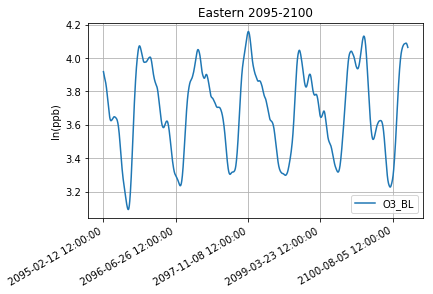

In [106]:
# Testing
test = filelist[0]
future_regression(test)

Eastern 12783 12783 12783 12783 12783
Regression Coefficients: -52.4818 0.0005 -0.0167 0.0664 0.0908
Tsuen Wan 12783 12783 12783 12783 12783
Regression Coefficients: -36.4214 0.0004 -0.0339 0.0488 0.0159
Tung Chung 12783 12783 12783 12783 12783
Regression Coefficients: -55.6366 0.0006 -0.0173 0.0725 -0.0222
Yuen Long 12783 12783 12783 12783 12783
Regression Coefficients: -55.8416 0.0006 -0.0287 0.0846 -0.0075
Kwai Chung 12783 12783 12783 12783 12783
Regression Coefficients: -57.7897 0.0006 -0.0303 0.0439 0.0446
Kwun Tong 12783 12783 12783 12783 12783
Regression Coefficients: -69.5804 0.0007 -0.0251 0.0509 0.2213
Macau 12783 12783 12783 12783 12783
Regression Coefficients: -7.1446 0.0002 -0.0466 -0.0022 -0.1675
Sha Tin 12783 12783 12783 12783 12783
Regression Coefficients: -20.6177 0.0003 -0.0307 0.0228 -0.1929
ShamShuiPo 12783 12783 12783 12783 12783
Regression Coefficients: -52.1175 0.0006 -0.0224 0.0602 -0.0047


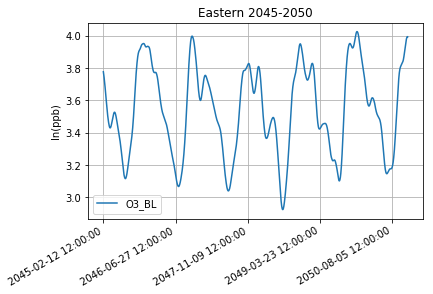

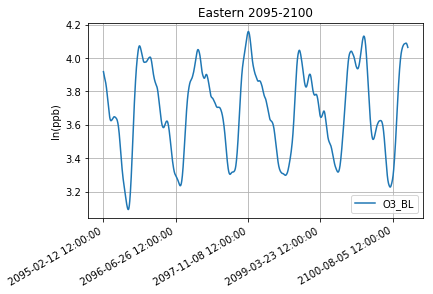

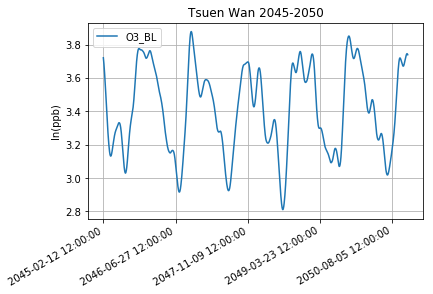

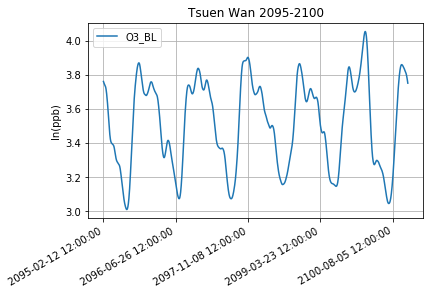

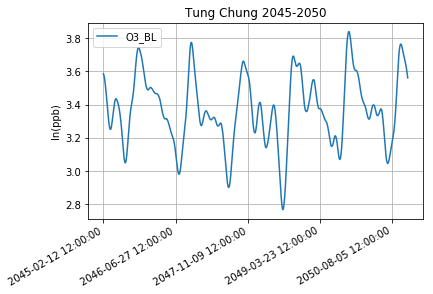

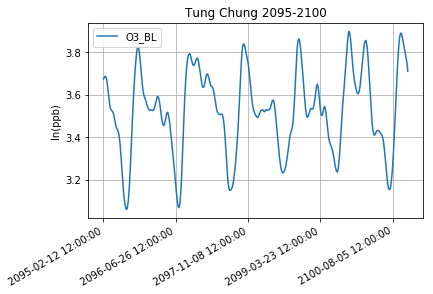

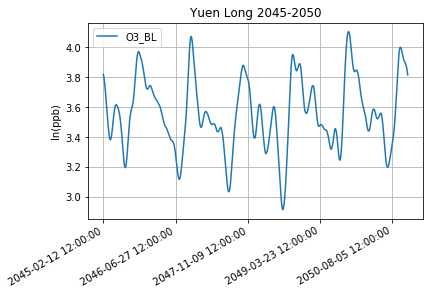

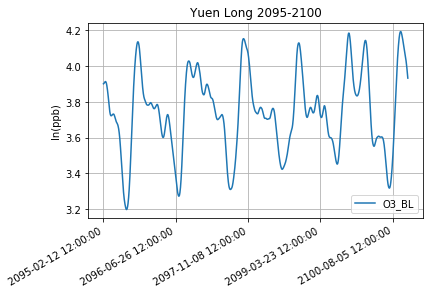

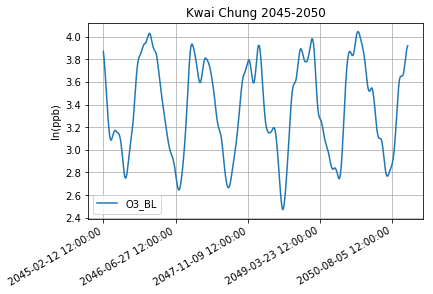

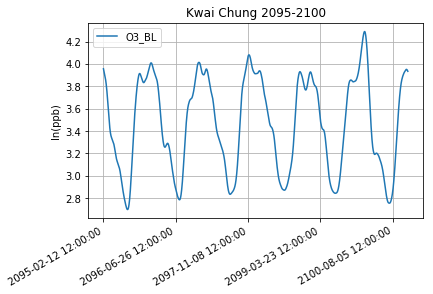

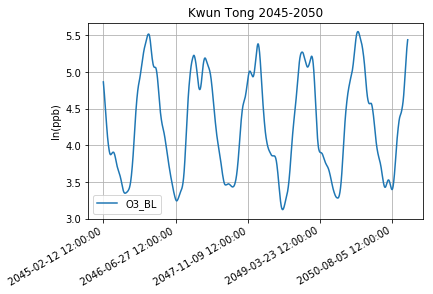

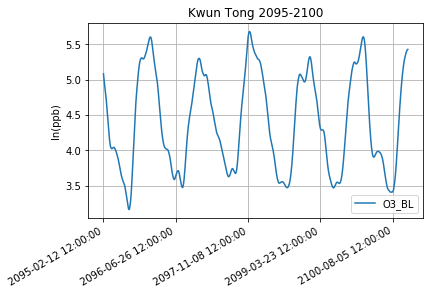

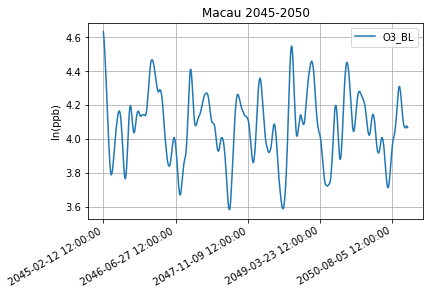

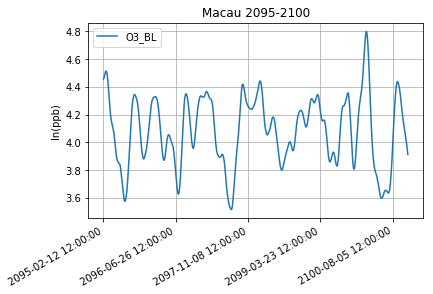

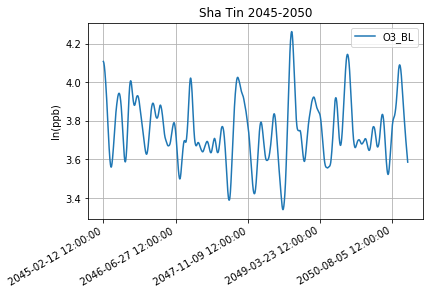

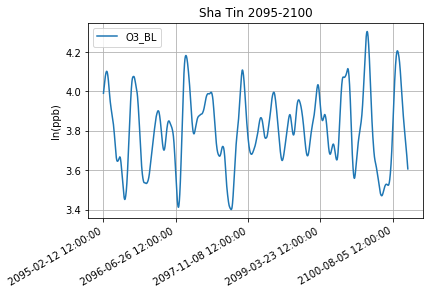

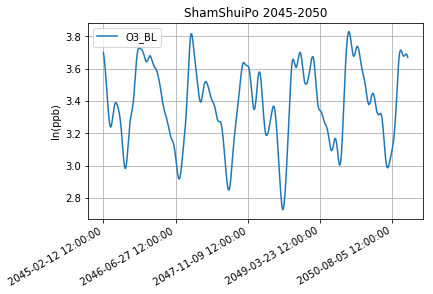

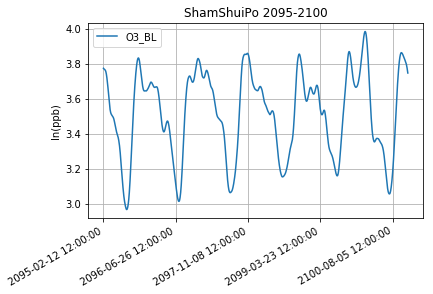

In [107]:
for i in range(len(filelist)):
    station = filelist[i]
    future_regression(station)